### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
print(data.head())

data.tail()

data.shape


# print(data.describe())




       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8           

(12684, 26)

2. Investigate the dataset for missing or problematic data.

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


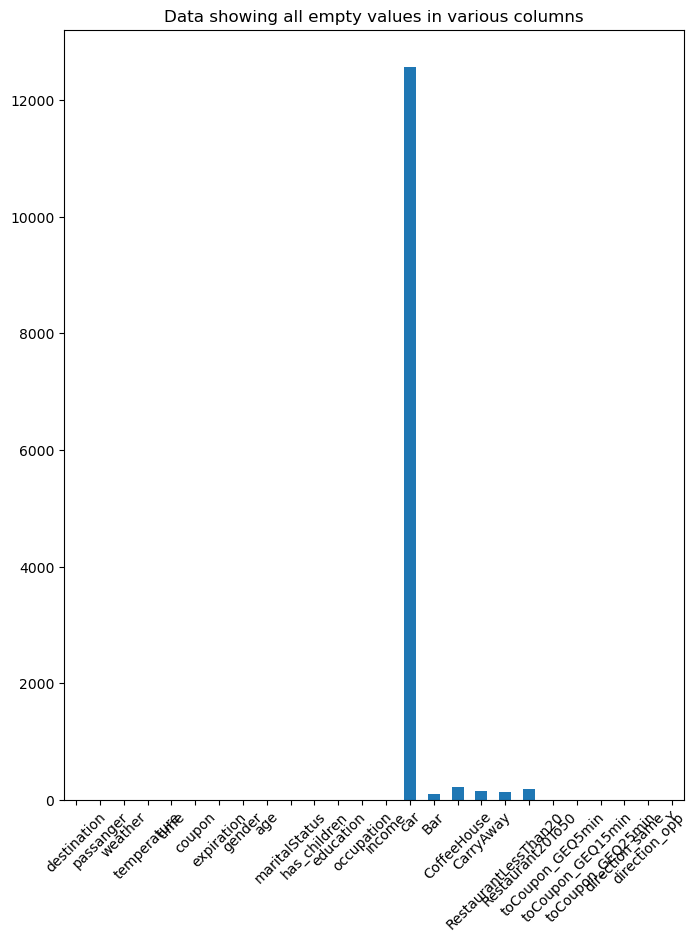

In [4]:
print(data.isnull().sum())


# Analyze the magnitude of missing data and visualize those


plt1 = data.isnull().sum().plot(kind='bar', figsize=(8, 10), title="Data showing all empty values in various columns")
plt.xticks(rotation=45)
plt.savefig('./images/before_dropping_car_col.png')

# displays car has the highest, and there are still other columns

data.drop(columns=["car"], inplace=True)



3. Decide what to do about your missing data -- drop, replace, other...

         Bar CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50
3336   never       less1       4~8                  1~3            never
618    never         gt8       1~3                  gt8              1~3
4417   less1       never       4~8                  4~8            never
9748   never         1~3       4~8                less1            never
2834   less1       never       4~8                less1            less1
8904   less1       less1       4~8                  1~3            less1
7878   less1         4~8       1~3                  1~3              1~3
12336  never       never       1~3                  1~3              1~3
2401   never       never       4~8                  gt8            less1
8350   never       never       1~3                  4~8              1~3
3558     gt8         1~3       NaN                  4~8            less1
1862     1~3       never     less1                  4~8            never
7213   never         1~3     never                 

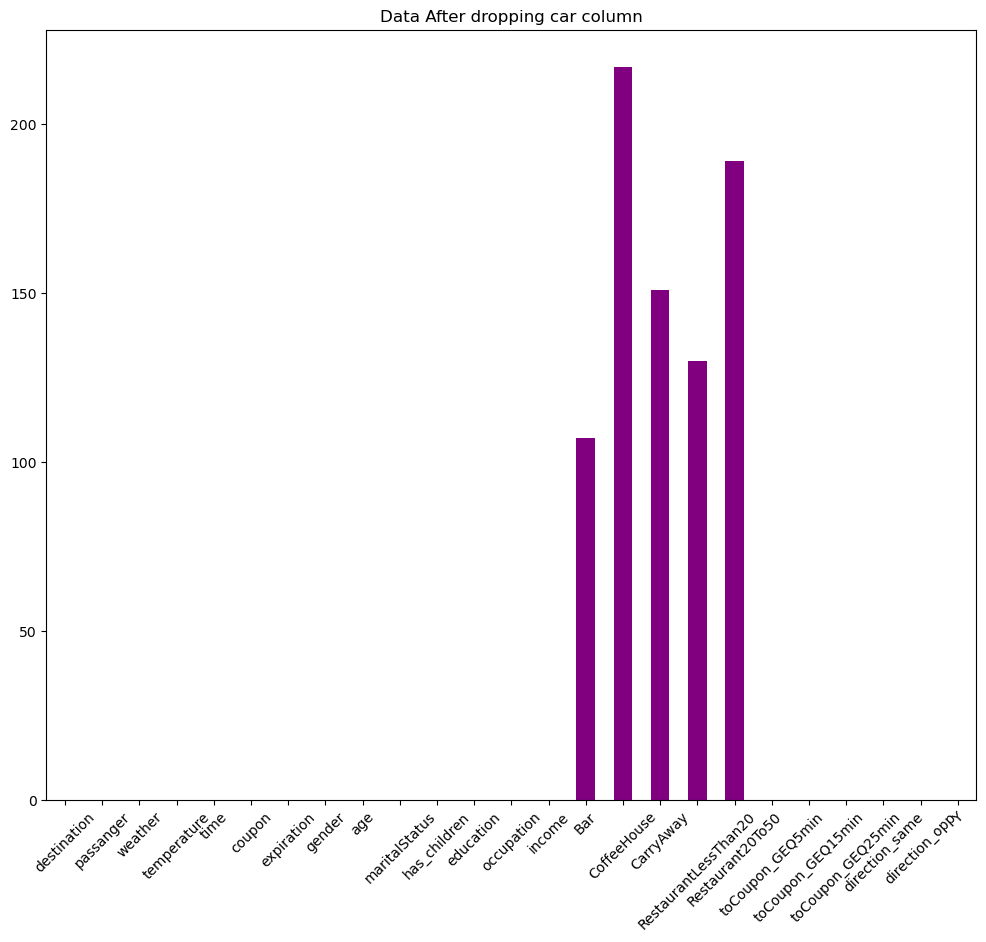

In [5]:
# Visualize again after dropping the car column as it cannot be used

plt2 = data.isnull().sum().plot(kind='bar', figsize=(12, 10), color='purple', title="Data After dropping car column")
plt.xticks(rotation=45)
plt.savefig('./images/after_dropping_car_col.png')


# From the below diagram, 5 more columns have empty data 
# Trying to analyze how those data look like and based on that, we can try to find alternatives

print(data[ ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'] ].sample(20))


# simply apply mode may not be an option in this case
# some data need to be converted eg: less1 -> 1, never -> 0, 4~8 -> (4 + 8)/2


columns_to_be_transformed = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

##
# this transformer function converts all similar data to be in number format
# 
##
def transformer(data):
    if data == 'never':
        return 0
    elif data == 'less1':
        return 1
    elif data == 'gt8':
        return 8
    elif '~' in str(data):
        parts = data.split('~')
        return (float(parts[0]) + float(parts[-1])) / 2
    else:
        return data
    

for col_name in columns_to_be_transformed:
    data[col_name] = data[col_name].apply(transformer)


# After this, fill the empty data with the mean to continue with the remaining analysis

for col_name in columns_to_be_transformed:
    data[col_name] = data[col_name].fillna( data[col_name].mode()[0] )


print(data[ ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'] ].sample(20))





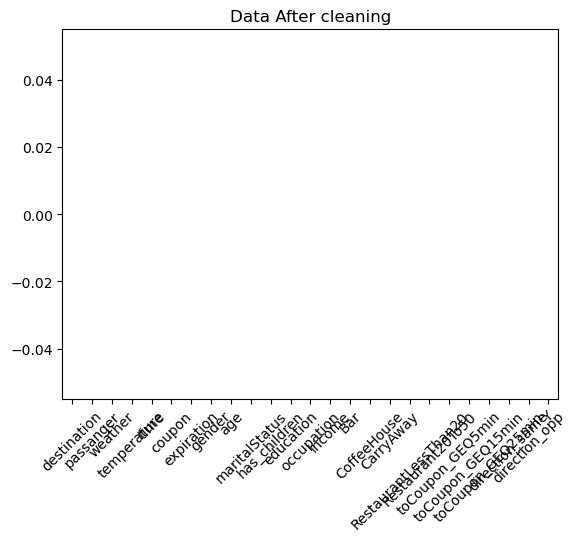

In [6]:
# check using bar chart again to see if there is any empty values
data.isnull().sum().plot(kind='bar', title="Data After cleaning")
plt.xticks(rotation=45)
plt.savefig('./images/after_cleaning_and_transforming.png')


# No more empty data!



4. What proportion of the total observations chose to accept the coupon?



56.84326710816777


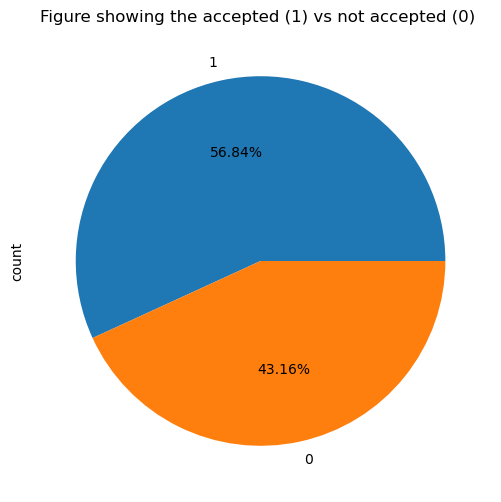

Percentage Accepted:  56.84 %
Percentage Rejected: 43.16 %


<Figure size 640x480 with 0 Axes>

In [7]:
# calculates the number of people accepted or Y

# calculates the number of people accepted or Y

total_accepted = data['Y'].mean() * 100

print(total_accepted)

total = data['Y'].value_counts()

total.plot(kind='pie', figsize=(6, 6), autopct='%1.2f%%', title="Figure showing the accepted (1) vs not accepted (0) " ) 
plt.show()
plt.savefig('./images/total_observations.png')

print('Percentage Accepted: ', round(total_accepted, 2), '%')

print('Percentage Rejected:', 100 - round(total_accepted, 2), '%')


5. Use a bar plot to visualize the `coupon` column.

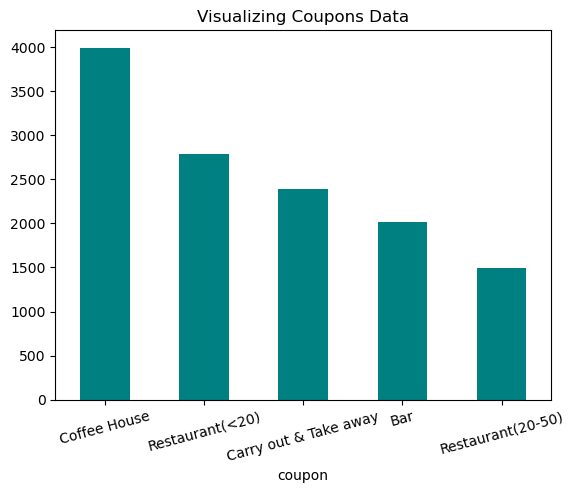

In [8]:
data['coupon'].value_counts().plot(kind='bar', title="Visualizing Coupons Data", color='Teal')
plt.xticks(rotation=15)
plt.savefig('./images/coupon_visualize_bar.png')

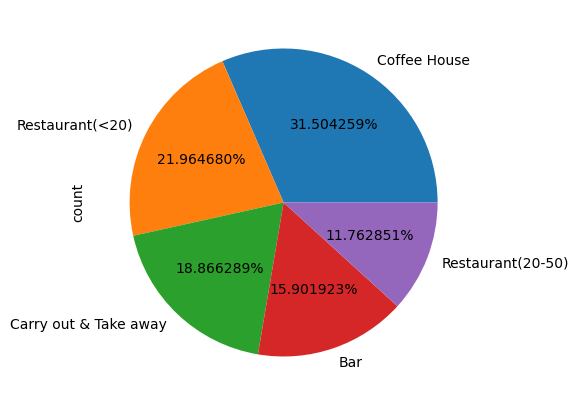

In [9]:
# Coupons data can also be visualized using a Pie chart 
# It conveys the percentage of each items and easier to follow

data['coupon'].value_counts().plot(kind='pie', figsize=(5, 5), autopct='%1f%%')
plt.savefig('./images/coupons_data_as_pie.png')
plt.show()

6. Use a histogram to visualize the temperature column. 

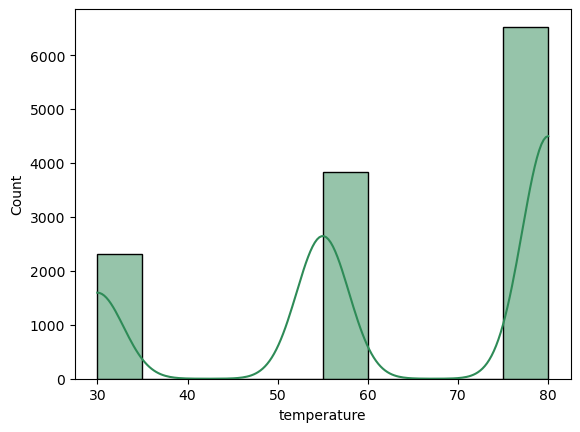

In [10]:
# Coupons data can also be visualized using a Pie chart 
# It conveys the percentage of each items and easier to follow

sns.histplot(data['temperature'], bins=10, kde=True, color="seagreen")
plt.savefig('./images/temperature_histogram.png')
plt.show()

       temperature  has_children  Bar  CoffeeHouse  CarryAway  \
0               55             1  0.0          0.0        2.0   
1               80             1  0.0          0.0        2.0   
2               80             1  0.0          0.0        2.0   
3               80             1  0.0          0.0        2.0   
4               80             1  0.0          0.0        2.0   
...            ...           ...  ...          ...        ...   
12679           55             0  0.0          0.0        2.0   
12680           55             0  0.0          0.0        2.0   
12681           30             0  0.0          0.0        2.0   
12682           30             0  0.0          0.0        2.0   
12683           80             0  0.0          0.0        2.0   

       RestaurantLessThan20  Restaurant20To50  toCoupon_GEQ5min  \
0                       6.0               2.0                 1   
1                       6.0               2.0                 1   
2                 

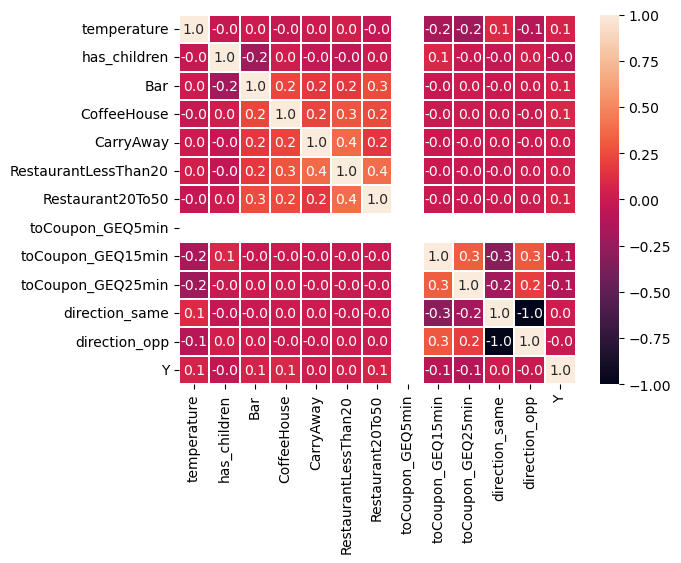

<Figure size 1500x1500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [11]:
numeric_columns = data.select_dtypes(include=['number'])
print(numeric_columns)
sns.heatmap(numeric_columns.corr(), annot=True, linewidths=0.1, fmt=".1f")
plt.figure(figsize=(15, 15))
plt.show()
plt.savefig('./images/heat_map_of_all_cols.png')



**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [12]:
#  apply filter to get coupons that matches Bar

df_with_bar_coupons = data[ data['coupon'] == 'Bar' ]

print(df_with_bar_coupons)

           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9             1d  Female  21  Unmarried partner  ...          0.0   

2. What proportion of bar coupons were accepted?


41.0
Acceptance is  41.0 %


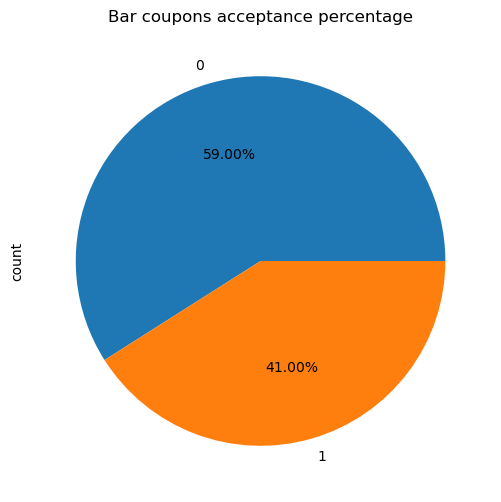

In [13]:

accepted = df_with_bar_coupons['Y'].mean() * 100

print(round(accepted, 2))
#  we can visually represent the acceptance using simple Pie chart

df_with_bar_coupons['Y'].value_counts().plot(kind='pie', autopct='%1.2f%%', figsize=(6,6), title='Bar coupons acceptance percentage' )

plt.savefig('./images/bar-coupons-acceptance.png')


print('Acceptance is ', round(accepted, 2), '%')

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


bar_visit_category
gt3    76.884422
lt3    37.073707
Name: Y, dtype: float64


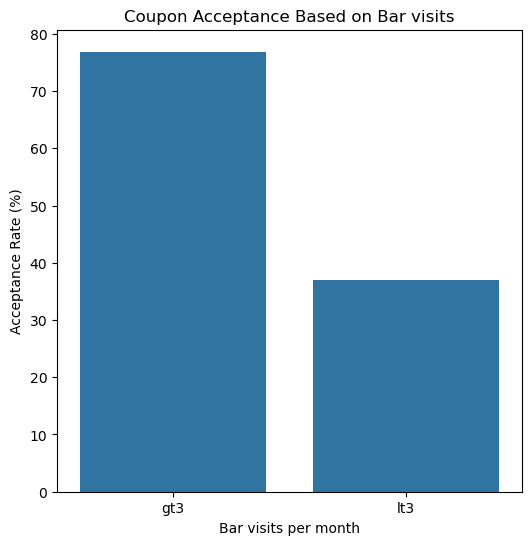

Answer: Yes there is a higher acceptance Rate in peole who visits more than 3 times


<Figure size 640x480 with 0 Axes>

In [14]:

df_with_bar_coupons = df_with_bar_coupons.assign( bar_visit_category = lambda df: df['Bar'].apply( lambda val: 'lt3' if val <= 3 else 'gt3' ))

acceptanceRates = df_with_bar_coupons.groupby('bar_visit_category')['Y'].mean() * 100

print(acceptanceRates)

plt.figure(figsize=(6,6))
sns.barplot(x=acceptanceRates.index, y=acceptanceRates.values)
plt.ylabel("Acceptance Rate (%)")
plt.xlabel("Bar visits per month")
plt.title("Coupon Acceptance Based on Bar visits")
plt.show()
plt.savefig('./images/coupon_acceptance_based_on_visit_freq.png')

print('Answer: Yes there is a higher acceptance Rate in peole who visits more than 3 times')

# THE WARNING IS BECAUSE THE NEW COL WAS ADDED TO THE SUBSET THAT WAS CREATED. 
# I AM LEAVING IT AS IS AS A REMINDER THAT THIS DATA DOESN't PERSIST IN THE MAIN DF



4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


['21' '46' '26' '31' '41' '50plus' '36' 'below21']
[0. 1. 2. 8. 6.]
[False  True]
freq_and_age_over_25
False    30.688753
True     54.597701
Name: Y, dtype: float64


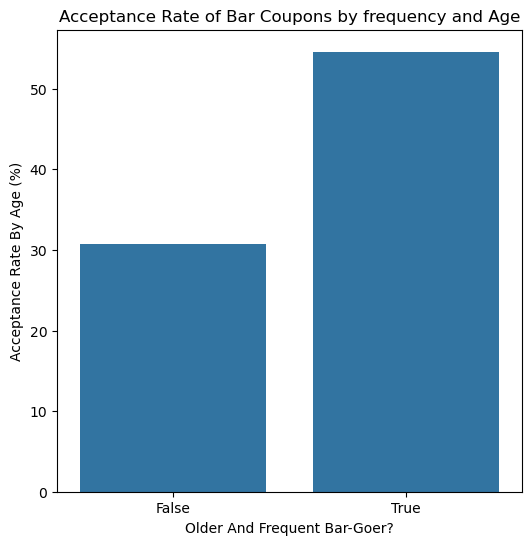

<Figure size 640x480 with 0 Axes>

In [15]:

# In order to interpret the age data, we need to see all kinds of values we have 
# and see any normalization needed


print(df_with_bar_coupons['age'].unique())

#  there are data with texts and numbers so we need to treat them differently 

above_25 = ['46','26','31','41','50plus','36']

print(df_with_bar_coupons['Bar'].unique())

df_with_bar_coupons = df_with_bar_coupons.assign( freq_and_age_over_25 = lambda df: df['age'].isin(above_25) & df['Bar'] >= 1)


print(df_with_bar_coupons['freq_and_age_over_25'].unique())


acceptance_by_age = df_with_bar_coupons.groupby('freq_and_age_over_25')['Y'].mean() * 100

print(acceptance_by_age)

plt.figure(figsize=(6, 6))
sns.barplot(x=acceptance_by_age.index.astype(str), y=acceptance_by_age.values)

plt.ylabel("Acceptance Rate By Age (%)")
plt.xlabel("Older And Frequent Bar-Goer?")
plt.title("Acceptance Rate of Bar Coupons by frequency and Age")
plt.show()
plt.savefig('./images/freq_and_age.png')



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


[False  True]
bar_goers_occup_kid
False    19.271445
True     56.861063
Name: Y, dtype: float64


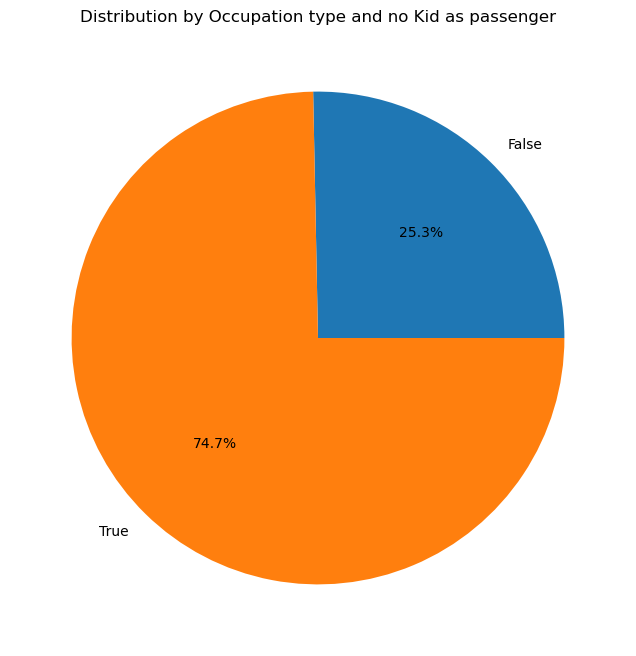

Result: Chart shows that More accepted people had no kids and did not have the occupation specified as Farmer fishing and forestry


<Figure size 640x480 with 0 Axes>

In [16]:

df_with_bar_coupons['occupation'].unique()

exclude_occup = ['Farming Fishing & Forestry']

df_with_bar_coupons = df_with_bar_coupons.assign( bar_goers_occup_kid = lambda df: df['Bar'] > 0 & ~df['occupation'].isin(exclude_occup) & ~df['passanger'].str.contains('Kid', case=False))


print(df_with_bar_coupons['bar_goers_occup_kid'].unique())

result = df_with_bar_coupons.groupby('bar_goers_occup_kid')['Y'].mean() * 100


print(result)

plt.figure(figsize=(8, 8))
plt.pie(result.values, labels=result.index, autopct='%1.1f%%')
plt.title('Distribution by Occupation type and no Kid as passenger')
plt.show()
plt.savefig('./images/occupation_and_kid_passenger.png')

print('=' * 80)
print('Result: Chart shows that More accepted people had no kids and did not have the occupation specified as Farmer fishing and forestry')
print('=' * 80)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
['21' '46' '26' '31' '41' '50plus' '36' 'below21']
[6. 2. 1. 8. 0.]
['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
bar_goers_with_condition1    551
bar_goers_with_condition2    215
bar_goers_with_condition3     98
dtype: int64


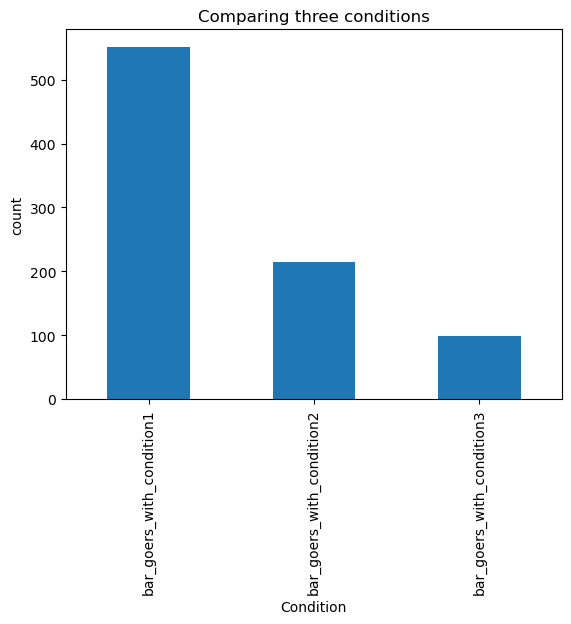

In [17]:

# explore marital status data and see any claning/normalization needed

print(df_with_bar_coupons['maritalStatus'].unique())

##
# condition1 -> bar goer more than once a month, no kid passenger, not widowed
##

condition1 = lambda df: ( (df['Bar'] > 1) & (~df['passanger'].str.contains('kid', case=False)) & (df['maritalStatus']!='Widowed') )

##
# condition2 -> bar goer more than once a month, no kid passenger, and under age 30
# check age data
##

print(df_with_bar_coupons['age'].unique())

ageBelow30 = ['21','26','below21']

condition2 = lambda df: ( (df['Bar'] > 1) & (~df['passanger'].str.contains('kid', case=False)) & (~df['age'].isin(ageBelow30) ) )

##
# condition3 -> bar goer cheap restaurant more than 4 times and income less than 50k
# 
##

# check for restaurant data and income data and see how to determine the criteria
print(df_with_bar_coupons['RestaurantLessThan20'].unique())
print(df_with_bar_coupons['income'].unique())



condition3 =  lambda df: ( (df['RestaurantLessThan20'] > 4) & (df['income'] == '$37500 - $49999' ))

df_with_bar_coupons = df_with_bar_coupons.assign(bar_goers_with_condition1 = condition1(df_with_bar_coupons),
                                                bar_goers_with_condition2 = condition2(df_with_bar_coupons),
                                                bar_goers_with_condition3 = condition3(df_with_bar_coupons))


condition_with_true_counts = df_with_bar_coupons[ ['bar_goers_with_condition1', 'bar_goers_with_condition2', 'bar_goers_with_condition3' ] ].sum()
condition_with_true_counts.columns = ['Conditions', 'Count']

print(condition_with_true_counts)



condition_with_true_counts.plot(kind='bar', title="Comparing three conditions", xlabel='Condition', ylabel='count')

plt.savefig('./images/comparing_conditions.png')



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [18]:
print('=' * 80)
print('Result-More People belonging to the condition1 - Meaning who often goes to the bar and not have a kid has a higher chance of accepting the bar coupon than any other categories')
print('=' * 80)


Result-More People belonging to the condition1 - Meaning who often goes to the bar and not have a kid has a higher chance of accepting the bar coupon than any other categories


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

0        below 75k
1        below 75k
2        below 75k
3        below 75k
4        below 75k
           ...    
12679    above 75k
12680    above 75k
12681    above 75k
12682    above 75k
12683    above 75k
Name: income_group, Length: 12684, dtype: object
income_group
below 75k    8154
above 75k    4530
Name: count, dtype: int64
income_group
above 75k    55.452539
below 75k    57.615894
Name: Y, dtype: float64


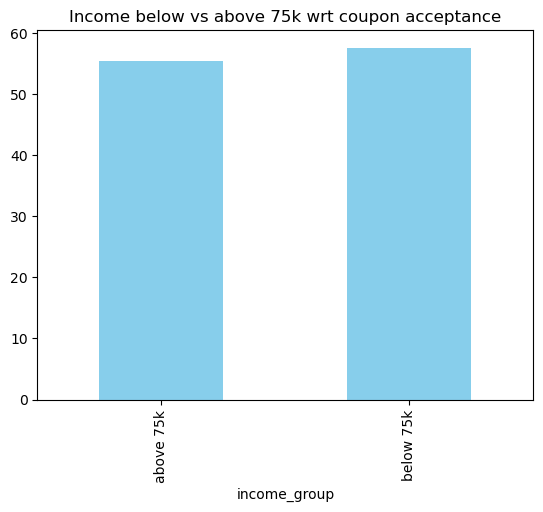

Income above and below 75k doesnt seem to be a strong contributing factor


<Figure size 640x480 with 0 Axes>

In [19]:
##
# Here, I will be analyzing the general tendency of accepting any type of coupons 
# and how they work together
##

## Impact of Income in accepting coupon

# Divide the income into two below 74k and above 74 k and which group accepted the coupon more
below_income_ranges = (
    '12500 - $24999',
    '$25000 - $37499',
    '$37500 - $49999',
    '$50000 - $62499',
    '$62500 - $74999'
)

data['income_group'] = data['income'].apply(lambda x: 'below 75k' if any(r in x for r in below_income_ranges) else 'above 75k')

print(data['income_group'])

# count of below and above income and see if they are proportionate
# in this case, they are very close


income_counts = data['income_group'].value_counts()
print(income_counts)




acceptance_by_income = data.groupby('income_group')['Y'].mean() * 100
print(acceptance_by_income)

acceptance_by_income.plot(kind='bar', color="skyblue", title='Income below vs above 75k wrt coupon acceptance')
plt.show()
plt.savefig('./images/income-group-impact.png')


print('=' * 80)
print('Income above and below 75k doesnt seem to be a strong contributing factor')
print('=' * 80)



['Female' 'Male']
gender
Female    54.722777
Male      59.079864
Name: Y, dtype: float64


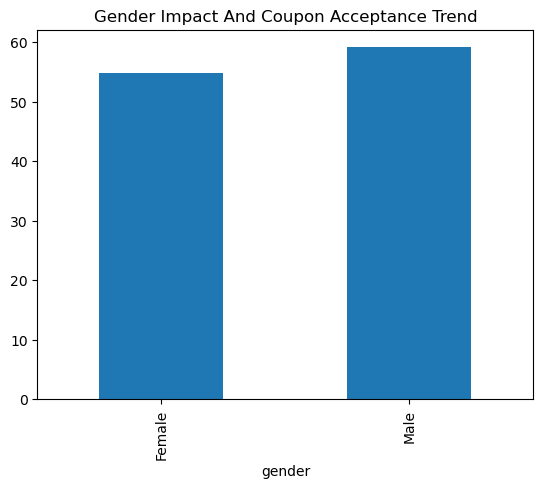

Result: Gender doesn't seem to play a critical role in accepting the Coupons


<Figure size 640x480 with 0 Axes>

In [20]:
# Does Gender play a role in accepting coupon ?
# check all types of data in the gender column

print(data['gender'].unique())
#  data is valid and no change needed on the gender column

acceptance_by_gender = data.groupby('gender')['Y'].mean() * 100
print(acceptance_by_gender)
acceptance_by_gender.plot(kind='bar', title='Gender Impact And Coupon Acceptance Trend')
plt.show()
plt.savefig('./images/gender-impact.png')

print('=' * 80)
print('Result: Gender doesn\'t seem to play a critical role in accepting the Coupons')
print('=' * 80)


['No Urgent Place' 'Home' 'Work']
destination
Home               50.633302
No Urgent Place    63.377367
Work               50.221239
Name: Y, dtype: float64


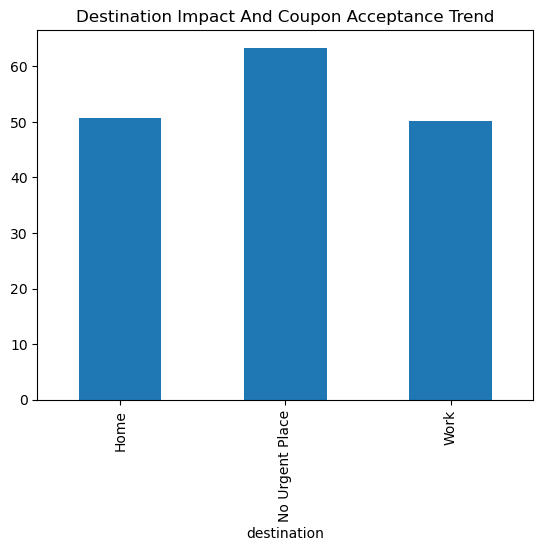

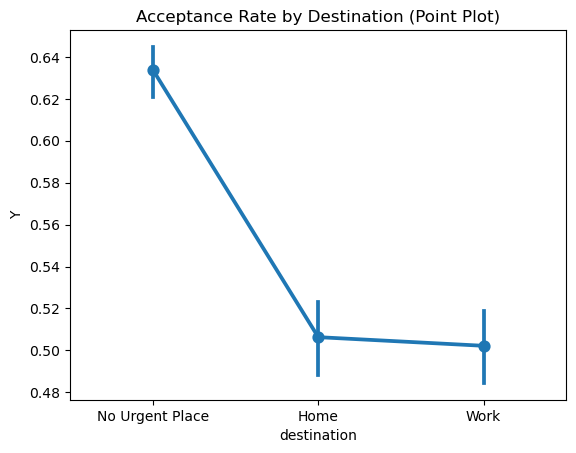

Result: This chart shows that destination play a crucial role in accepting the coupon. 
 In fact, people who were travelling to non urgent place has a higher chance to accept coupon


In [21]:
# Does Destination have a higher tendency in accepting the coupon ?

print(data['destination'].unique())
#  data is valid and no change needed on the gender column

acceptance_by_dest = data.groupby('destination')['Y'].mean() * 100
print(acceptance_by_dest)
acceptance_by_dest.plot(kind='bar', title='Destination Impact And Coupon Acceptance Trend')
plt.show()
plt.savefig('./images/destination-urgency-impact.png')

sns.pointplot(
    data=data,
    x='destination',
    y='Y',
    estimator='mean'
)
plt.title("Acceptance Rate by Destination (Point Plot)")
plt.savefig('./images/destination-urgency-impact_point-plot.png')
plt.show()


print('=' * 80)
print('Result: This chart shows that destination play a crucial role in accepting the coupon. \n In fact, people who were travelling to non urgent place has a higher chance to accept coupon')
print('=' * 80)



['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
passanger
Alone        52.580424
Friend(s)    67.343845
Kid(s)       50.497018
Partner      59.534884
Name: Y, dtype: float64


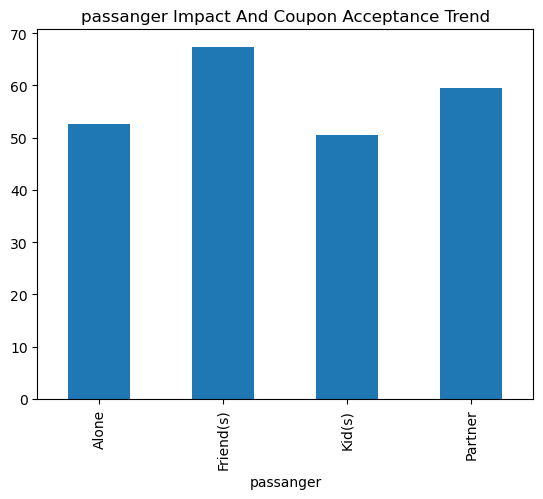

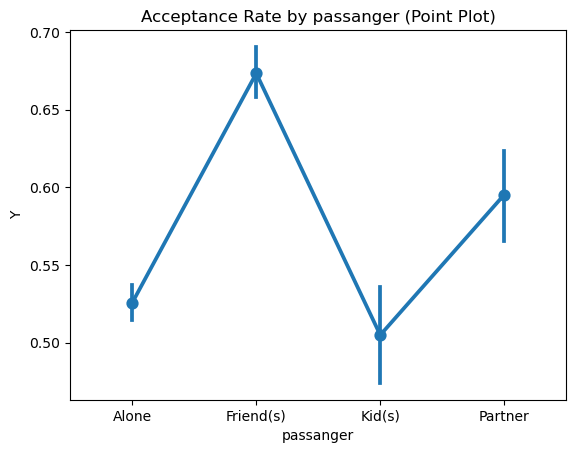

Result: This chart shows that travelling with Friends had a higher influence on accepting coupons. We can check further which type of coupon they accepted


In [22]:
# Does traveling alone vs friends have an impact ?

print(data['passanger'].unique())
#  data is valid and no change needed on the gender column

acceptance_by_direction = data.groupby('passanger')['Y'].mean() * 100
print(acceptance_by_direction)
acceptance_by_direction.plot(kind='bar', title='passanger Impact And Coupon Acceptance Trend')
plt.show()
plt.savefig('./images/passanger-urgency-impact.png')

sns.pointplot(
    data=data,
    x='passanger',
    y='Y',
    estimator='mean'
)
plt.title("Acceptance Rate by passanger (Point Plot)")
plt.savefig('./images/passanger-impact_point-plot.png')
plt.show()


print('=' * 80)
print('Result: This chart shows that travelling with Friends had a higher influence on accepting coupons. We can check further which type of coupon they accepted')
print('=' * 80)








['Sunny' 'Rainy' 'Snowy']
[55 80 30]
temperature  weather
30           Snowy      47.046263
             Sunny      62.458836
55           Rainy      46.280992
             Sunny      57.072243
80           Sunny      60.033701
Name: Y, dtype: float64


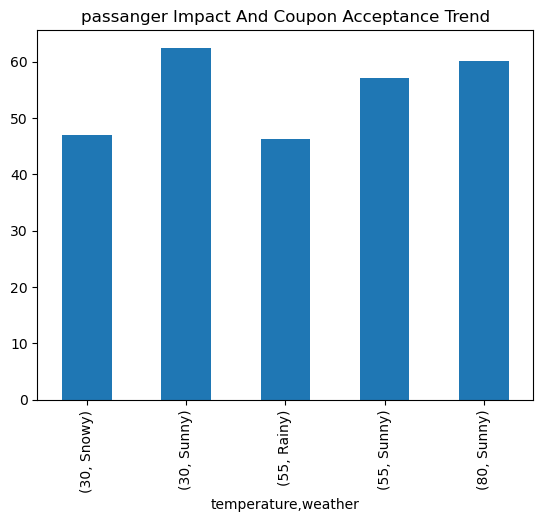

Result: This chart shows that


<Figure size 640x480 with 0 Axes>

In [29]:
# Does weather and temperature affect the decision?

print(data['weather'].unique())
print(data['temperature'].unique())


# Analyse how weather and temperature play together
acceptance_by_weather = data.groupby(['temperature', 'weather'])['Y'].mean() * 100
print(acceptance_by_weather)
acceptance_by_weather.plot(kind='bar', title='Temp and Weather And Coupon Acceptance Trend (Prefers Sunny!)')
plt.show()
plt.savefig('./images/weather-and-temp-impact.png')


# As Sunny weather has a positive influence overall, this alone can be considered as one of the key factors and temperature can be avoided


print('=' * 80)
print('Result: This chart shows that Sunny weather even in snowy temperature has more positive impact')
print('=' * 80)


['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
maritalStatus
Divorced             52.906977
Married partner      54.294118
Single               60.585017
Unmarried partner    56.129918
Widowed              47.692308
Name: Y, dtype: float64


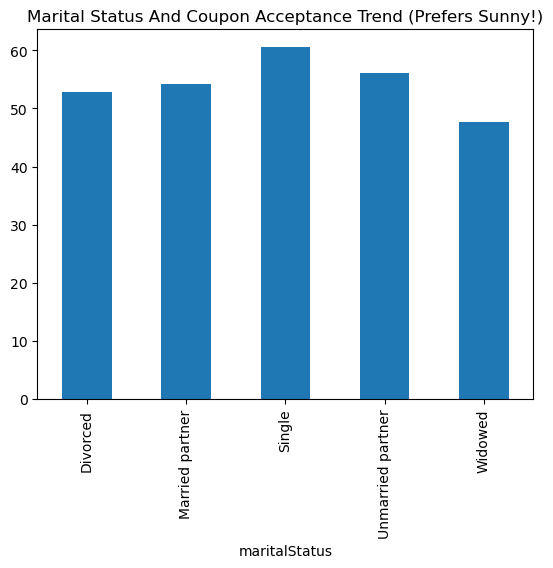

Result: This chart shows that 


<Figure size 640x480 with 0 Axes>

In [34]:
# Does marital status affect the decision?

print(data['maritalStatus'].unique())


# Analyse how weather and temperature play together
acceptance_by_maritalStatus = data.groupby(['maritalStatus'])['Y'].mean() * 100
print(acceptance_by_maritalStatus)
acceptance_by_maritalStatus.plot(kind='bar', title='Marital Status And Coupon Acceptance Trend (Prefers Sunny!)')
plt.show()
plt.savefig('./images/marital-status-impact.png')


# As Sunny weather has a positive influence overall, this alone can be considered as one of the key factors and temperature can be avoided


print('=' * 80)
print('Result: Though not a strong controbutor, but Single people tend to have higher chance of accepting coupons')
print('=' * 80)


positive_group
N    39.419908
Y    59.210173
Name: Y, dtype: float64


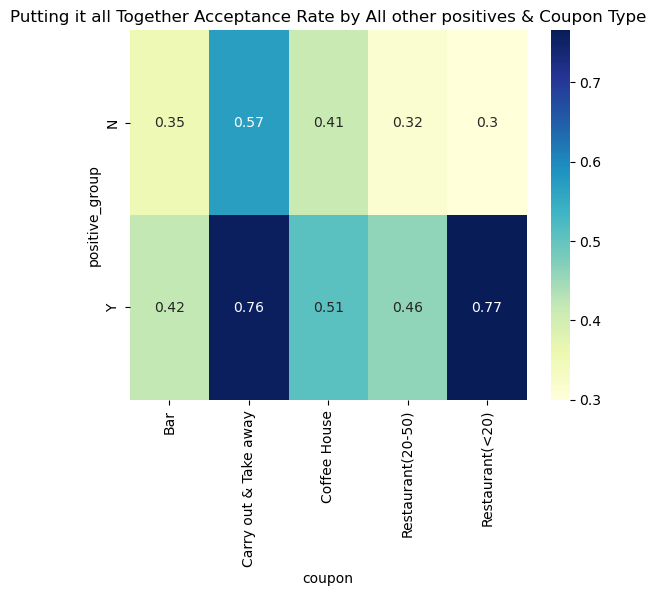

Conclusion - We determined that peopled preferred coupons  that are 
1. on A Sunny Day
2. Travelling with Friends
3. Not on an urgent trip
4. Coupon to a lower cost restaurant (Restaurant < 20)
5. offering takeouts
had well-received acceptance of the coupons


<Figure size 640x480 with 0 Axes>

In [39]:
# Putting together all positive factors and see how it did compared to a group that didnt fall in any

# Based on the analysis above, both travelling with friends, and destination urgency play a strong influence
# We can categorize the entire data in to two groups based on this and see the impact overall


def all_positive_factors(row):
    if ((row['destination'] == 'No Urgent Place') or 
        (row['passanger'] == 'Friend(s)') or
        (row['passanger'] == 'Partner') or
        (row['weather'] == 'Sunny')
       ):
        return 'Y'
    else:
        return 'N'

data = data.assign(
    positive_group = data.apply(all_positive_factors, axis=1))


print(data.groupby('positive_group')['Y'].mean() * 100)


acceptance_matrix = data.pivot_table(
    index='positive_group',
    columns='coupon',
    values='Y',
    aggfunc='mean'
)

sns.heatmap(acceptance_matrix, annot=True, cmap='YlGnBu')
plt.title("Putting it all Together Acceptance Rate by All other positives & Coupon Type")
plt.show()
plt.savefig('./images/acceptance_positives_and_coupons.png')


print('=' * 80)
print('=' * 80)
print('Conclusion - We determined that peopled preferred coupons  that are ')
print('\t 1. on A Sunny Day')
print('\t 2. Travelling with Friends')
print('\t 3. Not on an urgent trip')
print('\t 4. Coupon to a lower cost restaurant (Restaurant < 20)')
print('\t 5. offering takeouts')
print('had well-received acceptance of the coupons')
print('=' * 80)
print('=' * 80)
